In [275]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from torch.utils import data

from torchvision.datasets import MNIST
import torchvision.transforms as transforms

In [276]:
train_dataset = MNIST('./data', transform=transforms.ToTensor(), train=True, download=True)
test_dataset = MNIST('./data', transform=transforms.ToTensor(), train=False)

In [277]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

### 60000개의 이미지가 있고, <br>
### 한 이미지가 28x28개의 pixels로 구성되어 있다. 

In [278]:
train_dataset.data[0] # 첫번째 이미지, 255에 가까울수록 흰색을 의미

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [279]:
import matplotlib.pyplot as plt

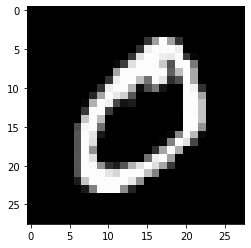

In [280]:
plt.imshow(train_dataset.data[1], cmap='gray') # cmap='gray', vmin=0, vmax=255
plt.show()

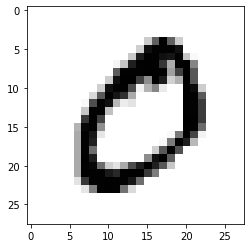

In [281]:
plt.imshow(train_dataset.data[1], cmap='gray_r') # cmap='gray', vmin=0, vmax=255
plt.show()

In [282]:
train_dataset.targets[1]

tensor(0)

In [283]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.Dense1 = nn.Linear(28*28, 512)
        self.Classifier = nn.Linear(512, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28) # 2차원 배열로 만듬
        x = F.relu(self.Dense1(x))
        return self.Classifier(x)

### Hiddenlayer 생성 <br>
### 512개의 노드로 구성 <br>
### relu를 활성화 함수로 사용 <br>
### 28x28개의 input을 받음 <br>
### Output layer 생성 <br>
### 10개의 노드로 구성 ( = 종속변수가 취할 수 있는 값의 갯수) <br>
### softmax 활성화함수 사용: CrossEntropyLoss에 내장되어 있음

In [284]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [285]:
train_loader = data.DataLoader(dataset = train_dataset, batch_size = 128, shuffle=True)
test_loader = data.DataLoader(dataset = test_dataset, batch_size = 128, shuffle = False)

In [286]:
model=Model()

In [287]:
criterion = nn.CrossEntropyLoss() # softmax가 내장

In [288]:
optimizer = optim.RMSprop(model.parameters(), lr=0.001)

In [289]:
epoch_n = 10
total, correct, loss = 0.0, 0.0, 0.0
model.train()
loss_list = []
acc_list = []
for epoch in range(epoch_n):
    for data, labels in train_loader:
        optimizer.zero_grad()

        output = model(data)
        batch_loss = criterion(output, labels)
        loss += batch_loss

        _, pred_y = torch.max(output, 1)
        pred_y = pred_y.view(-1)
        batch_loss.backward()
        optimizer.step()
        correct += torch.sum(torch.eq(pred_y, labels)).item()
        total += len(labels)
    
    acc = correct/total
    loss_epoch = loss/total
    loss_list.append(loss_epoch.item())
    acc_list.append(acc)
    print(f'Epoch: {epoch+1}/{epoch_n}, Acc: {acc:.4f}, Loss{loss_epoch:.8f}')


Epoch: 1/10, Acc: 0.9265, Loss0.00195721
Epoch: 2/10, Acc: 0.9477, Loss0.00139459
Epoch: 3/10, Acc: 0.9581, Loss0.00111419
Epoch: 4/10, Acc: 0.9647, Loss0.00093502
Epoch: 5/10, Acc: 0.9696, Loss0.00080594
Epoch: 6/10, Acc: 0.9733, Loss0.00070746
Epoch: 7/10, Acc: 0.9763, Loss0.00062983
Epoch: 8/10, Acc: 0.9787, Loss0.00056574
Epoch: 9/10, Acc: 0.9807, Loss0.00051350
Epoch: 10/10, Acc: 0.9824, Loss0.00046942


In [290]:
torch.save(model, './model/FNN_MNIST.pt')

## 예측하기

In [310]:
total, correct, loss = 0.0, 0.0, 0.0
model.eval()
for data, labels in train_loader:
    output = model(data)
    batch_loss = criterion(output, labels)
    loss += batch_loss

    _, pred_y = torch.max(output, 1)
    pred_y = pred_y.view(-1)
    correct += torch.sum(torch.eq(pred_y, labels)).item()
    total += len(labels)

acc = correct/total
loss_epoch = loss/total
print(f'Test Acc: {acc}, Loss{loss_epoch:.8f}')

Test Acc: 0.9986833333333334, Loss0.00004617


In [292]:
test_loader.dataset[0][1]

7

In [293]:
_, pred_y = torch.max(model(test_loader.dataset[0][0][0]), 1)
pred_y

tensor([7])

In [294]:
test_loader.dataset[0][0][0].shape

torch.Size([28, 28])

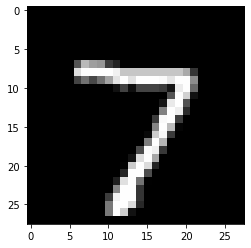

In [295]:
plt.imshow(test_loader.dataset[0][0][0], cmap='gray')
plt.show()

## Confusion matrix 확인하기

In [296]:
total, correct, loss = 0.0, 0.0, 0.0
y_ = []
y = []
model.eval()
for data, labels in test_loader:
    output = model(data)
    batch_loss = criterion(output, labels)
    loss += batch_loss

    _, pred_y = torch.max(output, 1)
    pred_y = pred_y.view(-1)
    y_.extend(pred_y)
    y.extend(labels)
    correct += torch.sum(torch.eq(pred_y, labels)).item()
    total += len(labels)

acc = correct/total
loss_epoch = loss/total
print(f'Test Acc: {acc:.4f}, Loss{loss_epoch:.8f}')

Test Acc: 0.9824, Loss0.00052627


In [297]:
from sklearn.metrics import classification_report, confusion_matrix

In [298]:
confusion_matrix(y, y_)

array([[ 970,    0,    1,    1,    0,    1,    2,    1,    3,    1],
       [   0, 1126,    4,    0,    0,    1,    2,    0,    2,    0],
       [   1,    1, 1020,    1,    1,    0,    2,    3,    3,    0],
       [   1,    0,    6,  992,    0,    3,    0,    1,    2,    5],
       [   1,    0,    7,    0,  955,    0,    5,    3,    1,   10],
       [   2,    0,    0,    9,    1,  868,    5,    0,    5,    2],
       [   2,    2,    0,    1,    1,    1,  951,    0,    0,    0],
       [   2,    5,   12,    0,    1,    0,    0, 1003,    2,    3],
       [   3,    0,    4,    1,    3,    1,    2,    3,  954,    3],
       [   1,    4,    0,    2,    5,    3,    2,    4,    3,  985]])

In [299]:
print(classification_report(y, y_))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Loss 확인하기

In [300]:
import matplotlib.pyplot as plt

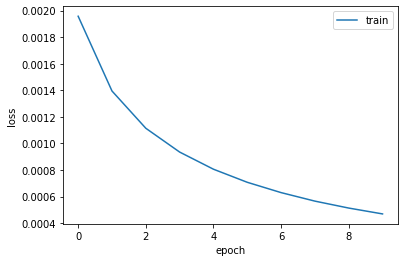

In [301]:
plt.plot(loss_list)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'])
plt.show()

# Accuracy 확인하기

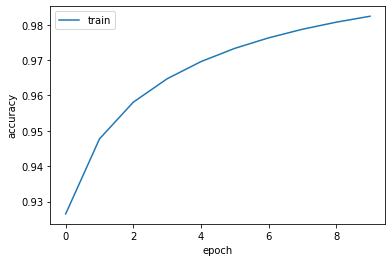

In [302]:
plt.plot(acc_list)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train'])
plt.show()

## Extended model

In [303]:
class Model_ext(nn.Module):
    def __init__(self):
        super(Model_ext, self).__init__()
        self.Dense1 = nn.Linear(28*28, 512)
        self.Dense2 = nn.Linear(512, 128)
        self.Classifier = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28) # 2차원 배열로 만듬
        x = F.relu(self.Dense1(x))
        x = F.relu(self.Dense2(x))
        return self.Classifier(x)

In [304]:
criterion = nn.CrossEntropyLoss() # softmax가 내장

In [305]:
model_ext = Model_ext()

In [306]:
optimizer = optim.RMSprop(model_ext.parameters(), lr=0.001)

In [307]:
epoch_n = 10
total, correct, loss = 0.0, 0.0, 0.0
model_ext.train()
loss_list = []
acc_list = []
for epoch in range(epoch_n):
    for data, labels in train_loader:
        optimizer.zero_grad()

        output = model_ext(data)
        batch_loss = criterion(output, labels)
        loss += batch_loss

        _, pred_y = torch.max(output, 1)
        pred_y = pred_y.view(-1)
        batch_loss.backward()
        optimizer.step()
        correct += torch.sum(torch.eq(pred_y, labels)).item()
        total += len(labels)
    
    acc = correct/total
    loss_epoch = loss/total
    loss_list.append(loss_epoch.item())
    acc_list.append(acc)
    print(f'Epoch: {epoch+1}/{epoch_n}, Acc: {acc:.4f}, Loss{loss_epoch:.8f}')


Epoch: 1/10, Acc: 0.9252, Loss0.00189778
Epoch: 2/10, Acc: 0.9484, Loss0.00130955
Epoch: 3/10, Acc: 0.9593, Loss0.00102957
Epoch: 4/10, Acc: 0.9662, Loss0.00085380
Epoch: 5/10, Acc: 0.9710, Loss0.00073026
Epoch: 6/10, Acc: 0.9747, Loss0.00063717
Epoch: 7/10, Acc: 0.9775, Loss0.00056569
Epoch: 8/10, Acc: 0.9796, Loss0.00051006
Epoch: 9/10, Acc: 0.9814, Loss0.00046382
Epoch: 10/10, Acc: 0.9829, Loss0.00042559


In [308]:
total, correct, loss = 0.0, 0.0, 0.0
model_ext.eval()
for data, labels in test_loader:
    output = model_ext(data)
    batch_loss = criterion(output, labels)
    loss += batch_loss

    _, pred_y = torch.max(output, 1)
    pred_y = pred_y.view(-1)
    correct += torch.sum(torch.eq(pred_y, labels)).item()
    total += len(labels)

acc = correct/total
loss_epoch = loss/total
print(f'Test Acc: {acc}, Loss{loss_epoch:.8f}')

Test Acc: 0.9809, Loss0.00069157
